In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
!wget 'https://cs.stanford.edu/group/mlgroup/MURA-v1.1.zip' 

--2020-07-07 16:21:25--  https://cs.stanford.edu/group/mlgroup/MURA-v1.1.zip
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3380245855 (3.1G) [application/zip]
Saving to: ‘MURA-v1.1.zip’

MURA-v1.1.zip       100%[===================>]   3.15G  14.3MB/s    in 3m 57s  

2020-07-07 16:25:23 (13.6 MB/s) - ‘MURA-v1.1.zip’ saved [3380245855/3380245855]



In [ ]:
!unzip MURA-v1.1.zip 

Streaming output truncated to the last 5000 lines.
   creating: MURA-v1.1/train/XR_SHOULDER/patient01061/study1_positive/
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01061/study1_positive/image1.png  
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01061/study1_positive/image3.png  
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01061/study1_positive/image2.png  
   creating: MURA-v1.1/train/XR_SHOULDER/patient01016/
   creating: MURA-v1.1/train/XR_SHOULDER/patient01016/study1_positive/
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01016/study1_positive/image1.png  
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01016/study1_positive/image3.png  
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01016/study1_positive/image2.png  
   creating: MURA-v1.1/train/XR_SHOULDER/patient01182/
   creating: MURA-v1.1/train/XR_SHOULDER/patient01182/study1_positive/
  inflating: MURA-v1.1/train/XR_SHOULDER/patient01182/study1_positive/image1.png  
  inflating: MURA-v1.1/train/XR_SHOULDER/pati

In [ ]:
drive_path='/content/drive/My Drive/MURA Challenge/data/'
path='/content/drive/My Drive/MURA Challenge/data/MURA-v1.1/'
colab_path='/content/MURA-v1.1/'
path_to_saved_models='/content/drive/My Drive/Deep Learning/cnn_saved_models/'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from tqdm import tqdm
from glob import glob
import tensorflow as tf
from tensorflow import keras

In [ ]:
# os.listdir(path)

In [ ]:
train_imgs_path=pd.read_csv(colab_path+'train_image_paths.csv',dtype=str,header=None,names=['Img_Path'])
train_labels=pd.read_csv(colab_path+'train_labeled_studies.csv',dtype=str,names=['Img_Path','Label'],header=None)
test_imgs_path=pd.read_csv(colab_path+'valid_image_paths.csv',dtype=str,header=None,names=['Img_Path'])
test_labels=pd.read_csv(colab_path+'valid_labeled_studies.csv',dtype=str,names=['Img_Path','Label'],header=None)

In [ ]:
def keep_dir(dir):
  x=list(dir.split('/'))
  x='/'.join(x[:5])
  x=x+'/'
  return x
def keep_dir2(dir):
  x=list(dir.split('/'))
  x='/'.join(x[3:5])
  x=x+'/'
  return x

In [ ]:
keep_dir('MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png')

'MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/'

In [ ]:
train_imgs_path['path_to_merge']=train_imgs_path['Img_Path'].apply(lambda x: keep_dir(x))
test_imgs_path['path_to_merge']=test_imgs_path['Img_Path'].apply(lambda x: keep_dir(x))

In [ ]:
train_data=train_imgs_path.merge(train_labels,how='inner',left_on='path_to_merge', right_on='Img_Path')
test_data=test_imgs_path.merge(test_labels,how='inner',left_on='path_to_merge', right_on='Img_Path')

In [ ]:
train_data['Body_Part']=train_data['Img_Path_x'].apply(lambda x: str(x.split('/')[2]))
test_data['Body_Part']=test_data['Img_Path_x'].apply(lambda x: str(x.split('/')[2]))
train_data['Patient/Study']=train_data['Img_Path_x'].apply(lambda x: str(x.split('/')[3:5]))
test_data['Patient/Study']=test_data['Img_Path_x'].apply(lambda x: str(x.split('/')[3:5]))
train_data['Patient/Study']=train_data['Img_Path_x'].apply(lambda x: keep_dir2(x) )
test_data['Patient/Study']=test_data['Img_Path_x'].apply(lambda x: keep_dir2(x) )
train_data.drop(columns=['path_to_merge','Img_Path_y'],inplace=True)
train_data.rename(columns={'Img_Path_x':'Img_Path'},inplace=True)
test_data.drop(columns=['path_to_merge','Img_Path_y'],inplace=True)
test_data.rename(columns={'Img_Path_x':'Img_Path'},inplace=True)

test_labels['Body_Part']=test_labels['Img_Path'].apply(lambda x: str(x.split('/')[2]))
test_labels['Patient/Study']=test_labels['Img_Path'].apply(lambda x:  keep_dir2(x))


# train_data.Img_Path=train_data.Img_Path.apply(lambda x: drive_path+x)
# test_data.Img_Path=test_data.Img_Path.apply(lambda x: drive_path+x)

### Prep Data For Training




In [ ]:
# train_data=train_data[train_data.Body_Part=='XR_ELBOW']

In [ ]:
shuffled=train_data.sample(frac=1)

In [ ]:
msk = np.random.rand(len(shuffled)) < 0.8

train = shuffled[msk]

val= shuffled[~msk]

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
#split train data to train and val
#X_train, X_val, y_train, y_val=train_test_split(train_data.Img_Path,to_categorical(train_data.Label), test_size=0.2, random_state=42)

### Define Evaluation metrics & Helper Functions


In [ ]:
import keras.backend as K
def recall(y_true, y_pred):
    
    """
    Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision(y_true, y_pred):
    
    """
    Precision metric.
    Only computes a batch-wise average of precision.
    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    Source
    ------
    https://github.com/fchollet/keras/issues/5400#issuecomment-314747992
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1(y_true, y_pred):
    
    """Calculate the F1 score."""
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r))


# def accuracy(y_true, y_pred):
#     return K.mean(K.equal(y_true, K.round(y_pred)), axis=1)

In [ ]:
# for visualizing the training progress of our models
%matplotlib inline
import matplotlib.pyplot as plt
def viz_history(hs_dict,metric):
  plt.style.use('dark_background')
  plt.rcParams['figure.figsize'] = [15, 8]
  plt.rcParams['font.size'] = 16
  plt.clf()
  for model in hs_dict.keys():
    plt.plot(hs_dict[model].history[metric],label='{0:s} train {1:s}'.format(model, metric))
    plt.plot(hs_dict[model].history['val_{0:s}'.format(metric)],label='{0:s} validation {1:s}'.format(model, metric))
    plt.ylabel(metric) 
    plt.xlabel('epoch')
    plt.legend()
  plt.show()

### Create CNN model

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications import ResNet101
from keras.applications.densenet import DenseNet169
from keras.callbacks import *

In [ ]:
model_params={'conv_dropout':0.2,
              'conv_layers':3,
              'conv_activation':'relu',
              'kernel_size':(3, 3),
              'strides':(1, 1),
              'batch_normalization':True,
              'dropout':True,
              'hidden_units':512,
              'hidden_layers':1,
              'hidden_activation':'relu',
              'lr':1e-3,
              'learning_rate':1e-3,
              'pooling':'avg'
              }

In [ ]:
def train_model(model_params,
                optimizer=Adam,
                epochs=100,
                batch_size=32,
                size=224,
                body_type='XR_ELBOW',
                callbacks_list=None,
                verbose=1,
                classes=2
                ):
    
    np.random.seed(1402) # Define the seed for numpy to have reproducible experiments.
    
    input_shape=(size,size,3)

    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      horizontal_flip=True,
  )

    train_generator=train_datagen.flow_from_dataframe(
        dataframe=train[train.Body_Part==body_type],
        directory=None,
        x_col="Img_Path",
        y_col="Label",
        weight_col=None,
        target_size=(size, size),
        color_mode="rgb",
        classes=None,
        class_mode="categorical",
        batch_size=batch_size,
        shuffle=False,
        seed=1,
        save_to_dir=None,
        save_prefix="",
        save_format="png",
        interpolation="nearest",
        validate_filenames=False,
    )

    val_datagen=ImageDataGenerator(
        rescale=1./255)

    val_generator=val_datagen.flow_from_dataframe(
        dataframe=val[val.Body_Part==body_type],
        directory=None,
        x_col="Img_Path",
        y_col="Label",
        weight_col=None,
        target_size=(size, size),
        color_mode="rgb",
        classes=None,
        class_mode="categorical",
        batch_size=batch_size,
        shuffle=False,
        seed=1,
        save_to_dir=None,
        save_prefix="",
        save_format="png",
        interpolation="nearest",
        validate_filenames=False
    )

    #model parameters for training
    STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
    STEP_SIZE_VALID=val_generator.n//val_generator.batch_size


    
    # Define the input layer.
    input = Input(
        shape=input_shape,
        name='Input'
    )

    x = input
    # Define the convolutional layers.
    for i in range(model_params['conv_layers']):
        x = Conv2D(
            filters=64*(2**i),
            kernel_size=model_params['kernel_size'],
            strides=model_params['strides'],
            padding='same',
            dilation_rate=(1, 1),
            activation=model_params['conv_activation'],
            name='Conv2D-{0:d}'.format(i + 1)
        )(x)


        if model_params['batch_normalization']:
            x = BatchNormalization(axis=2,name='Batch_Normalization-{0:d}'.format(i + 1)
                                )(x)


        x = MaxPool2D(
            pool_size=(2, 2),
            strides=(2, 2),
            padding='same',
            name='MaxPool2D-{0:d}'.format(i + 1)
        )(x)
        if model_params['conv_dropout']:
            x = Dropout(
                rate=model_params['conv_dropout'],
                name='Conv_Dropout-{0:d}'.format(i + 1)
            )(x)
    # Flatten the convolved images so as to input them to a Dense Layer
    if model_params['pooling']:
      x=GlobalAveragePooling2D()(x)
    else:
      x = Flatten(name='Flatten')(x)



    for i in range(model_params['hidden_layers']):
        x = Dense(
            units=model_params['hidden_units'],
            kernel_initializer='glorot_uniform',
            activation=model_params['hidden_activation'],
            name='Hidden-{0:d}'.format(i + 1)
        )(x)
        if model_params['dropout']:
          x = Dropout(
                rate=model_params['dropout'],
                name='Dropout-{0:d}'.format(i + 1)
            )(x)

        
    # Define the output layer.
    output = Dense(
        units=classes,
        kernel_initializer='uniform',
        activation='softmax',
        name='Output'
    )(x)

    # Define the model and train it.
    model = Model(inputs=input, outputs=output)
    if(optimizer==Adam):
      model.compile(optimizer=optimizer(model_params['learning_rate']), loss='categorical_crossentropy', metrics=['accuracy',f1])

    else:
      model.compile(optimizer=optimizer(model_params['lr'],momentum=0.9,nesterov=True), loss='categorical_crossentropy', metrics=['accuracy',f1])

    print('------------------')
    model.summary() # Print a description of the model.
    display(keras.utils.plot_model(model, to_file='model.png', show_shapes=True, dpi=50))
    
    hs = model.fit(
        train_generator,
        epochs=epochs,
        steps_per_epoch=STEP_SIZE_TRAIN,
        validation_data=val_generator,
        validation_steps=STEP_SIZE_VALID,
        callbacks=callbacks_list,
        verbose=verbose
    )
    print('Finished training.')
    print('------------------')
    # model.summary() # Print a description of the model.
    return model, hs

In [ ]:
from sklearn.metrics import *
def evaluate_model(
    body_part='XR_ELBOW',
    model=None
):
  test_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      horizontal_flip=True,)
  
  test_generator=test_datagen.flow_from_dataframe(
      dataframe=test_data[test_data.Body_Part==body_part],
      directory=None,
      x_col="Img_Path",
      y_col="Label",
      weight_col=None,
      target_size=(224, 224),
      color_mode="rgb",
      classes=None,
      class_mode="categorical",
      batch_size=128,
      shuffle=False,
      seed=1,
      save_to_dir=None,
      save_prefix="",
      save_format="png",
      interpolation="nearest",
      validate_filenames=False
  )

  tta_steps = 10
  predictions = []

  for i in tqdm(range(tta_steps)):
      preds = model.predict(test_generator,verbose=1)
      predictions.append(preds)


  preds = np.mean(predictions, axis=0)

  voting_df=pd.DataFrame(data=np.c_[test_data[test_data.Body_Part==body_part]['Patient/Study'].values,preds],
                       columns=['Patient/Study','Class 0 prob','Class 1 prob'])
  
  voting_df[['Class 0 prob', 'Class 1 prob']] = voting_df[['Class 0 prob', 'Class 1 prob']].apply(pd.to_numeric)   
  voting_df=voting_df.groupby('Patient/Study').mean().reset_index()
  voting_df['Class_prediction']=np.argmax(voting_df.iloc[:,1:3].values,axis=1)
  voting_df=voting_df.merge(test_labels[test_labels.Body_Part==body_part],how='inner',on='Patient/Study')
  voting_df=voting_df.drop(columns=['Img_Path'])
  voting_df['Label'] = voting_df['Label'].apply(pd.to_numeric) 
  kappa_score=cohen_kappa_score(voting_df.Class_prediction,voting_df.Label)
  f1=f1_score(voting_df.Class_prediction,voting_df.Label)
  return [kappa_score,f1,voting_df]

#### ELBOW

Found 3952 non-validated image filenames belonging to 2 classes.
Found 979 non-validated image filenames belonging to 2 classes.
------------------
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 224, 224, 3)       0         
_________________________________________________________________
Conv2D-1 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
Batch_Normalization-1 (Batch (None, 224, 224, 16)      896       
_________________________________________________________________
MaxPool2D-1 (MaxPooling2D)   (None, 112, 112, 16)      0         
_________________________________________________________________
Conv_Dropout-1 (Dropout)     (None, 112, 112, 16)      0         
_________________________________________________________________
Conv2D-2 (Conv2D)            (None, 112, 11

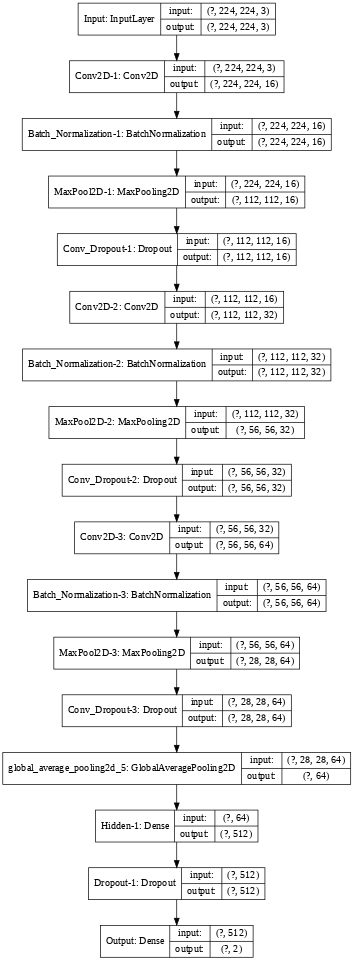

Epoch 1/100
123/123 [==============================] - 67s 547ms/step - loss: 0.6711 - accuracy: 0.5730 - val_loss: 0.5759 - val_accuracy: 0.5896
Epoch 2/100
123/123 [==============================] - 67s 543ms/step - loss: 0.6618 - accuracy: 0.5906 - val_loss: 0.6865 - val_accuracy: 0.5766
Epoch 3/100
123/123 [==============================] - 67s 541ms/step - loss: 0.6558 - accuracy: 0.6041 - val_loss: 0.6187 - val_accuracy: 0.5829
Epoch 4/100
123/123 [==============================] - 66s 537ms/step - loss: 0.6578 - accuracy: 0.5982 - val_loss: 0.6951 - val_accuracy: 0.5755
Epoch 5/100
123/123 [==============================] - 66s 535ms/step - loss: 0.6543 - accuracy: 0.6038 - val_loss: 0.6395 - val_accuracy: 0.5924
Epoch 6/100
123/123 [==============================] - 66s 535ms/step - loss: 0.6537 - accuracy: 0.6107 - val_loss: 0.6330 - val_accuracy: 0.5966

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 7/100
123/123 [=====================

KeyError: ignored

<Figure size 1080x576 with 0 Axes>

In [ ]:
callbacks_list = [EarlyStopping(monitor='val_loss', patience=10, verbose=1,restore_best_weights=True),
                ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5,cooldown=5, verbose=1, mode='auto'),
            ModelCheckpoint(filepath=path_to_saved_models+'XR_ELBOW_best_model_cnn.h5', monitor='val_loss', save_best_only=True)]




cnn_model,cnn_hs =train_model(model_params=model_params,
                              epochs=100,
                              optimizer=Adam,
                              batch_size=32,
                              body_type='XR_ELBOW',
                              callbacks_list=callbacks_list,
                              verbose=1)




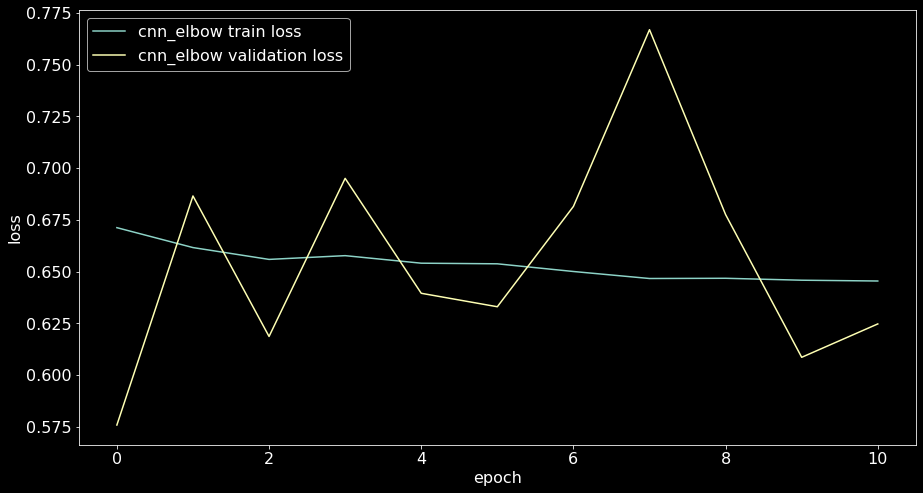

In [ ]:
viz_history(hs_dict={'cnn_elbow':cnn_hs},metric='loss')


### Remove Dropout

In [ ]:
model_params={'conv_dropout':0.2,
              'conv_layers':3,
              'conv_activation':'relu',
              'kernel_size':(3, 3),
              'strides':(1, 1),
              'batch_normalization':False,
              'dropout':False,
              'hidden_units':512,
              'hidden_layers':1,
              'hidden_activation':'relu',
              'lr':1e-4,
              'learning_rate':1e-4,
              'pooling':'avg'
              }

Found 3952 non-validated image filenames belonging to 2 classes.
Found 979 non-validated image filenames belonging to 2 classes.
------------------
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 224, 224, 3)       0         
_________________________________________________________________
Conv2D-1 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
MaxPool2D-1 (MaxPooling2D)   (None, 112, 112, 16)      0         
_________________________________________________________________
Conv_Dropout-1 (Dropout)     (None, 112, 112, 16)      0         
_________________________________________________________________
Conv2D-2 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
MaxPool2D-2 (MaxPooling2D)   (None, 56, 56,

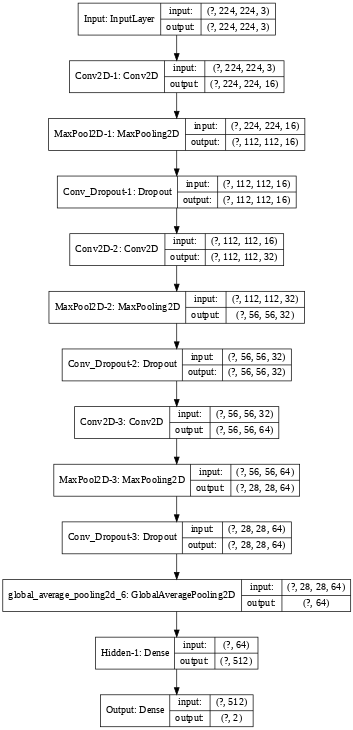

Epoch 1/100
123/123 [==============================] - 63s 515ms/step - loss: 0.6833 - accuracy: 0.5929 - f1: 0.5927 - val_loss: 0.6553 - val_accuracy: 0.5896 - val_f1: 0.5896
Epoch 2/100
123/123 [==============================] - 63s 513ms/step - loss: 0.6760 - accuracy: 0.5949 - f1: 0.5948 - val_loss: 0.6852 - val_accuracy: 0.5776 - val_f1: 0.5734
Epoch 3/100
123/123 [==============================] - 63s 511ms/step - loss: 0.6631 - accuracy: 0.5974 - f1: 0.5973 - val_loss: 0.6562 - val_accuracy: 0.5850 - val_f1: 0.5806
Epoch 4/100
123/123 [==============================] - 62s 507ms/step - loss: 0.6591 - accuracy: 0.5878 - f1: 0.5877 - val_loss: 0.6759 - val_accuracy: 0.5734 - val_f1: 0.5685
Epoch 5/100
123/123 [==============================] - 62s 503ms/step - loss: 0.6570 - accuracy: 0.5908 - f1: 0.5904 - val_loss: 0.6728 - val_accuracy: 0.5723 - val_f1: 0.5681
Epoch 6/100
123/123 [==============================] - 62s 505ms/step - loss: 0.6537 - accuracy: 0.5939 - f1: 0.5938 - v

In [ ]:
callbacks_list = [EarlyStopping(monitor='val_loss', patience=10, verbose=1,restore_best_weights=True),
                ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5,cooldown=5, verbose=1, mode='auto'),
            ModelCheckpoint(filepath=path_to_saved_models+'XR_ELBOW_best_model_no_drop.h5', monitor='val_loss', save_best_only=True)]




cnn_model,cnn_hs =train_model(model_params=model_params,
                              epochs=100,
                              optimizer=Adam,
                              batch_size=32,
                              body_type='XR_ELBOW',
                              callbacks_list=callbacks_list,
                              verbose=1)



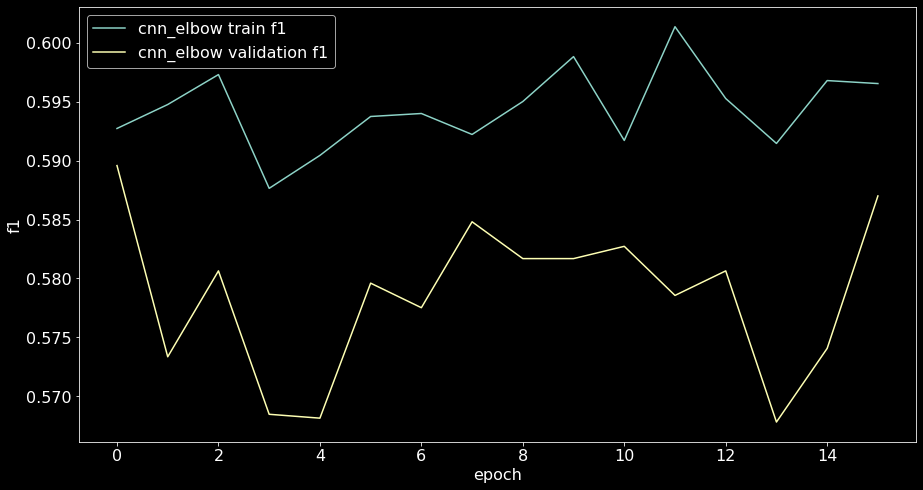

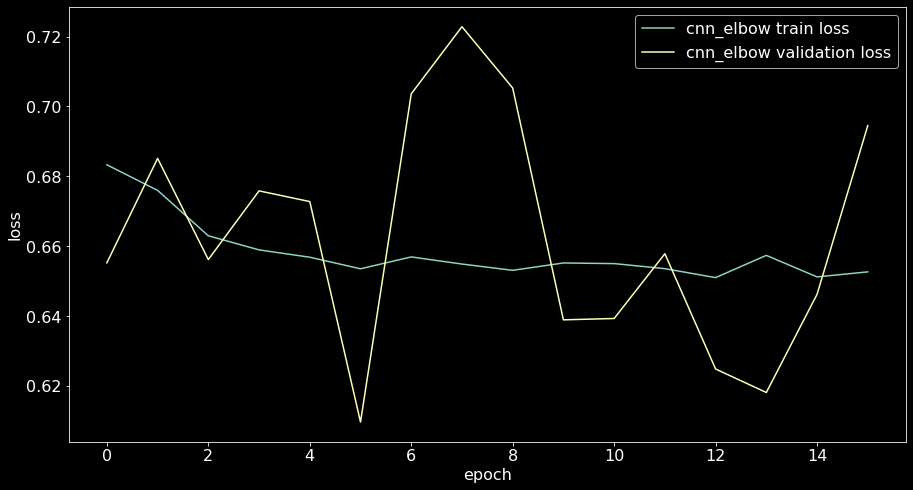

In [ ]:
viz_history(hs_dict={'cnn_elbow':cnn_hs},metric='f1')
viz_history(hs_dict={'cnn_elbow':cnn_hs},metric='loss')

We observe that it is not learning

### Let's see if using another architecture from keras applications resolves this issue. We train the model without the imagenet weights to see if this might be the issue.Bone Type is Forearm because has very few data 

In [ ]:
def configurable_train_model(
        upper_layers_optimizer,
        full_network_optimizer,
        upper_layers_epochs=15,
        full_network_epochs=10,
        body_type='XR_ELBOW',
        input_shape=(224,224,3),
        mlp_hidden_layers=[512],
        mlp_hidden_activation='relu',
        mlp_dropout=0.2,
        output_activation='softmax',
        pretrained_model=VGG16,
        batch_norm=True,
        callbacks_upper=None,
        callbacks_full=None,
        batch_size=32,
        class_weights=None,
        classes=2,
        augment_train_data=False,
        verbose=1):
    
    np.random.seed(1402) # Define the seed for numpy to have reproducible experiments.
   

    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      horizontal_flip=True,
  )

    val_datagen=ImageDataGenerator(
        rescale=1./255)


    train_generator=train_datagen.flow_from_dataframe(
        dataframe=train[train.Body_Part==body_type],
        directory=None,
        x_col="Img_Path",
        y_col="Label",
        weight_col=None,
        target_size=(224, 224),
        color_mode="rgb",
        classes=None,
        class_mode="categorical",
        batch_size=batch_size,
        shuffle=False,
        seed=1,
        save_to_dir=None,
        save_prefix="",
        save_format="png",
        interpolation="nearest",
        validate_filenames=False,
    )

    val_generator=val_datagen.flow_from_dataframe(
        dataframe=val[val.Body_Part==body_type],
        directory=None,
        x_col="Img_Path",
        y_col="Label",
        weight_col=None,
        target_size=(224, 224),
        color_mode="rgb",
        classes=None,
        class_mode="categorical",
        batch_size=batch_size,
        shuffle=False,
        seed=1,
        save_to_dir=None,
        save_prefix="",
        save_format="png",
        interpolation="nearest",
        validate_filenames=False
    )

    #model parameters for training
    STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
    STEP_SIZE_VALID=val_generator.n//val_generator.batch_size



    base_model =pretrained_model(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape,
        pooling='avg'
    )


    x = base_model.output
    # Define MLP layers.
    for i, units in enumerate(mlp_hidden_layers):
        x = Dense(
            units=units,
            kernel_initializer='glorot_uniform',
            activation=mlp_hidden_activation,
            name='Hidden-{0:d}'.format(i + 1)
        )(x)
        if mlp_dropout > 0:
            x = Dropout(rate=mlp_dropout)(x)
   
    
    # Define the output layer.
    output = Dense(
        units=classes,
        activation=output_activation,
        name='Output'
    )(x)

    # Define the model and train it.
    model = Model(inputs=base_model.input, outputs=output)

    # First train the upper layers for a few epochs
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=upper_layers_optimizer, loss='categorical_crossentropy', metrics=['accuracy',f1])

    
    hs_upper_layers = model.fit(
      train_generator,
      epochs=upper_layers_epochs,
      steps_per_epoch=STEP_SIZE_TRAIN,
      validation_data=val_generator,
      validation_steps=STEP_SIZE_VALID,
      callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1,restore_best_weights=True)],
      verbose=1
    )
    print('Finished training upper layers.')
    print('------------------')
    
    if augment_train_data:
      # Now train the whole network with a low learning rate
      for layer in base_model.layers:
          layer.trainable = True
      


      model.compile(optimizer=full_network_optimizer, loss='categorical_crossentropy', metrics=['accuracy',f1])
      #model.summary() # Print a description of the model.
      for i in range(1,5):
        print('iteration ',i)

        hs_full_network = model.fit(
          train_generator,
          epochs=full_network_epochs,
          steps_per_epoch=STEP_SIZE_TRAIN,
          validation_data=val_generator,
          validation_steps=STEP_SIZE_VALID,
          callbacks=[EarlyStopping(monitor='val_loss', patience=5, verbose=1,restore_best_weights=True),
                ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2,cooldown=2, verbose=1,min_lr=1e-8, mode='auto'),
                ModelCheckpoint(filepath=path_to_saved_models+body_type+'_best_model_vgg16_aug_train.h5', monitor='val_loss', save_best_only=True)],
          verbose=1
        )
        print('Finished training full network.')
        print('------------------')
    else:
      # Now train the whole network with a low learning rate
      for layer in base_model.layers:
          layer.trainable = True
      


      model.compile(optimizer=full_network_optimizer, loss='categorical_crossentropy', metrics=['accuracy',f1])
      model.summary() # Print a description of the model.
      
      hs_full_network = model.fit(
        train_generator,
        epochs=full_network_epochs,
        steps_per_epoch=STEP_SIZE_TRAIN,
        validation_data=val_generator,
        validation_steps=STEP_SIZE_VALID,
        callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1,restore_best_weights=True),
                keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2,cooldown=2, verbose=1,min_lr=1e-8, mode='auto'),
                keras.callbacks.ModelCheckpoint(filepath=path_to_saved_models+body_type+'_best_model_vgg16_aug_train.h5', monitor='val_loss', save_best_only=True)],
        verbose=1
      )
      print('Finished training full network.')
      print('------------------')
    
    return model,  hs_full_network


Found 3952 non-validated image filenames belonging to 2 classes.
Found 979 non-validated image filenames belonging to 2 classes.
Epoch 1/10
123/123 [==============================] - 79s 640ms/step - loss: 0.6774 - accuracy: 0.5936 - f1: 0.5935 - val_loss: 0.6013 - val_accuracy: 0.5896 - val_f1: 0.5896
Epoch 2/10
123/123 [==============================] - 77s 629ms/step - loss: 0.6756 - accuracy: 0.5959 - f1: 0.5958 - val_loss: 0.6957 - val_accuracy: 0.5776 - val_f1: 0.5734
Epoch 3/10
123/123 [==============================] - 75s 608ms/step - loss: 0.6750 - accuracy: 0.5954 - f1: 0.5953 - val_loss: 0.6340 - val_accuracy: 0.5850 - val_f1: 0.5806
Epoch 4/10
123/123 [==============================] - 75s 613ms/step - loss: 0.6755 - accuracy: 0.5952 - f1: 0.5950 - val_loss: 0.6493 - val_accuracy: 0.5797 - val_f1: 0.5754
Epoch 5/10
123/123 [==============================] - 75s 609ms/step - loss: 0.6745 - accuracy: 0.5962 - f1: 0.5960 - val_loss: 0.6887 - val_accuracy: 0.5808 - val_f1: 0.5

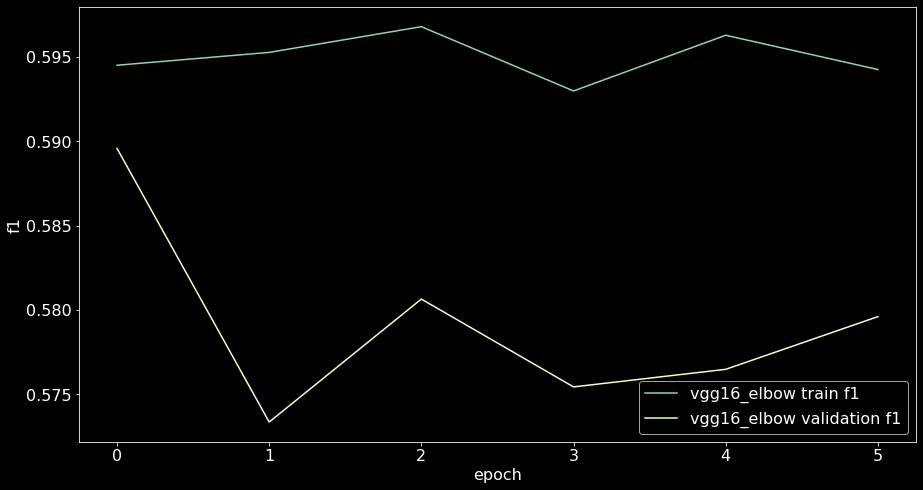

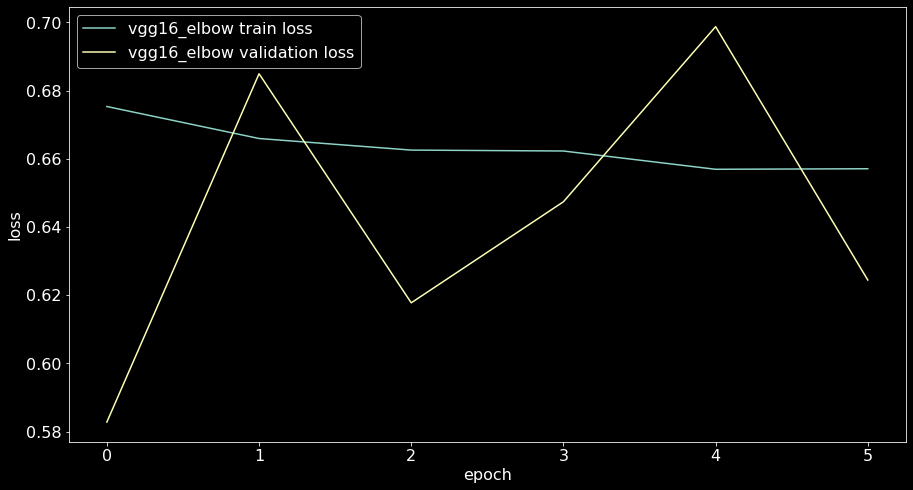

In [ ]:
callbacks_upper= [EarlyStopping(monitor='val_loss', patience=5, verbose=1,restore_best_weights=True)]
callbacks_full = [EarlyStopping(monitor='val_loss', patience=5, verbose=1,restore_best_weights=True),
                ReduceLROnPlateau(monitor='val_f1', factor=0.1, patience=2,cooldown=2, verbose=1, mode='auto'),
            #ModelCheckpoint(filepath=path_to_saved_models+'XR_ELBOW_best_model_vgg16_no_weights.h5', monitor='val_loss', save_best_only=True)]

upper_layers_optimizer = Adam()
full_network_optimizer = Adam(1e-5)

# vgg16_model,vgg16_hs = train_model(pooling='avg',
#     body_type='XR_ELBOW',
#     full_network_epochs=20,
#     optimizer=optimizer,
#     output_activation='softmax',
#     callbacks_list=callback_list ,
#     verbose=1)


vgg16_model,vgg16_hs = configurable_train_model(batch_size=32,
                                                mlp_hidden_layers=[512],
                                                full_network_epochs=15,
                                                upper_layers_epochs=10,
                                                upper_layers_optimizer=upper_layers_optimizer,
                                                full_network_optimizer=full_network_optimizer,
                                                body_type='XR_ELBOW',
                                                output_activation='softmax',
                                                class_weights=None,
                                                callbacks_upper=callbacks_upper,
                                                callbacks_full=callbacks_full,
                                                verbose=1)



viz_history(hs_dict={'vgg16_elbow':vgg16_hs},metric='f1')
viz_history(hs_dict={'vgg16_elbow':vgg16_hs},metric='loss')

### Augment Train Data

Found 1442 non-validated image filenames belonging to 2 classes.
Found 383 non-validated image filenames belonging to 2 classes.
Epoch 1/10
45/45 [==============================] - 23s 515ms/step - loss: 0.6579 - accuracy: 0.6355 - f1: 0.6326 - val_loss: 0.7190 - val_accuracy: 0.6477 - val_f1: 0.6477
Epoch 2/10
45/45 [==============================] - 22s 488ms/step - loss: 0.6106 - accuracy: 0.6617 - f1: 0.6583 - val_loss: 0.5467 - val_accuracy: 0.6752 - val_f1: 0.6754
Epoch 3/10
45/45 [==============================] - 21s 477ms/step - loss: 0.6371 - accuracy: 0.6426 - f1: 0.6396 - val_loss: 0.5952 - val_accuracy: 0.6439 - val_f1: 0.6442
Epoch 4/10
45/45 [==============================] - 21s 476ms/step - loss: 0.6090 - accuracy: 0.6695 - f1: 0.6660 - val_loss: 0.6355 - val_accuracy: 0.6296 - val_f1: 0.6302
Epoch 5/10
45/45 [==============================] - 21s 474ms/step - loss: 0.5860 - accuracy: 0.7028 - f1: 0.7028 - val_loss: 0.6466 - val_accuracy: 0.6667 - val_f1: 0.6668
Restor

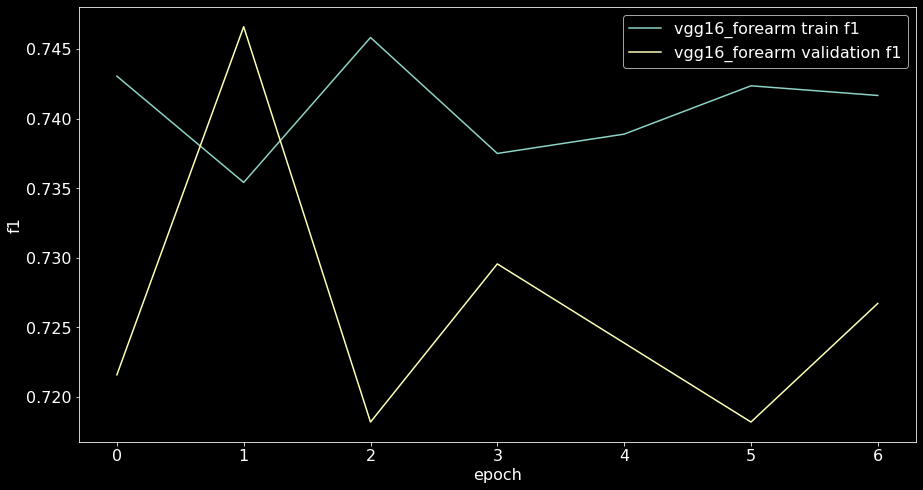

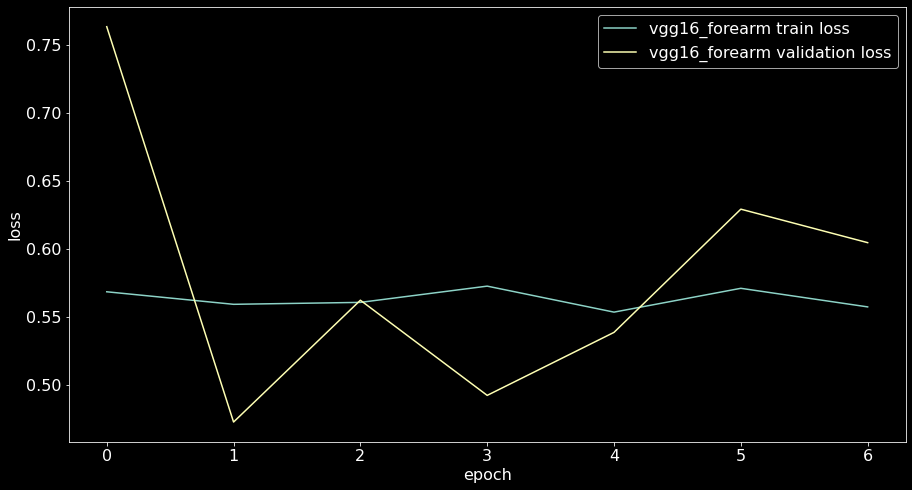

In [ ]:
# callbacks_upper= [EarlyStopping(monitor='val_loss', patience=5, verbose=1,restore_best_weights=True)]
# callbacks_full = [EarlyStopping(monitor='val_loss', patience=5, verbose=1,restore_best_weights=True),
#                 ReduceLROnPlateau(monitor='val_f1', factor=0.1, patience=2,cooldown=2, verbose=1, mode='auto'),
#             #ModelCheckpoint(filepath=path_to_saved_models+'XR_ELBOW_best_model_vgg16_no_weights.h5', monitor='val_loss', save_best_only=True)
#             ]

upper_layers_optimizer = Adam()
full_network_optimizer = Adam(1e-4)

# vgg16_model,vgg16_hs = train_model(pooling='avg',
#     body_type='XR_ELBOW',
#     full_network_epochs=20,
#     optimizer=optimizer,
#     output_activation='softmax',
#     callbacks_list=callback_list ,
#     verbose=1)


vgg16_model,vgg16_hs = configurable_train_model(batch_size=32,
                                                mlp_hidden_layers=[512],
                                                full_network_epochs=15,
                                                upper_layers_epochs=10 ,
                                                upper_layers_optimizer=upper_layers_optimizer,
                                                full_network_optimizer=full_network_optimizer,
                                                body_type='XR_FOREARM',
                                                output_activation='softmax',
                                                # callbacks_upper=callbacks_upper,
                                                # callbacks_full=callbacks_full,
                                                augment_train_data=True,
                                                verbose=1)



viz_history(hs_dict={'vgg16_forearm':vgg16_hs},metric='f1')
viz_history(hs_dict={'vgg16_forearm':vgg16_hs},metric='loss')

In [ ]:
store_results={}

In [ ]:
store_results['vgg_forearm_aug_train_data']=evaluate_model(body_part='XR_FOREARM',model=vgg16_model)

  0%|          | 0/10 [00:00<?, ?it/s]

Found 301 non-validated image filenames belonging to 2 classes.
3/3 [==============================] - 14s 5s/step


 10%|█         | 1/10 [00:14<02:09, 14.40s/it]

3/3 [==============================] - 5s 2s/step


 20%|██        | 2/10 [00:19<01:33, 11.65s/it]

3/3 [==============================] - 5s 2s/step


 30%|███       | 3/10 [00:25<01:08,  9.81s/it]

3/3 [==============================] - 5s 2s/step


 40%|████      | 4/10 [00:30<00:51,  8.52s/it]

3/3 [==============================] - 6s 2s/step


 50%|█████     | 5/10 [00:36<00:38,  7.62s/it]

3/3 [==============================] - 6s 2s/step


 60%|██████    | 6/10 [00:41<00:28,  7.02s/it]

3/3 [==============================] - 5s 2s/step


 70%|███████   | 7/10 [00:47<00:19,  6.57s/it]

3/3 [==============================] - 6s 2s/step


 80%|████████  | 8/10 [00:52<00:12,  6.28s/it]

3/3 [==============================] - 6s 2s/step


 90%|█████████ | 9/10 [00:58<00:06,  6.08s/it]

3/3 [==============================] - 6s 2s/step


100%|██████████| 10/10 [01:04<00:00,  6.42s/it]


In [ ]:
for k,v in store_results.items():
  print('{}: Kappa Score {:.3f} f1 {:.3f}'.format(k,v[0],v[1]))

vgg_forearm_aug_train_data: Kappa Score 0.216 f1 0.440
